In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

## Edit title

In [79]:
cancer_data = pd.read_excel('../../data/cancer_data.xls')
cancer_info = pd.read_excel('../../data/cancer_info.xlsx')

title_dic = cancer_info.groupby('变量名')['变量名缩写'].apply(list).to_dict()
for k, v in title_dic.items():
    cancer_data.rename(columns={k:v[0]}, inplace=True)
cancer_data.replace('UN', np.nan, inplace=True)

cancer_data.to_csv('../../data/cancer_data.csv', index=False)

## Process outlier

In [121]:
cancer_data = pd.read_csv('../../data/cancer_data.csv')
for i in cancer_data.columns:
    cancer_data[i] = cancer_data[i].apply(lambda x: np.nan if isinstance(x, str) and x[0] in ['>','<'] else x)

C:\Users\Chi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (5,6,34,50,66,68,69,70,71,72) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [106]:
cancer_data.columns

Index(['ID', 'A=Case, B=Control', 'Origin', 'A=male B=female', 'Age',
       'Pattern', 'TNM', 'Smoke', 'RBC', 'HGB', 'HCT', 'MCV ', 'MCH', 'MCHC ',
       'RDW-CV', 'RDW-SD', 'PLT', 'PCT', 'MPV', 'P-LCR', 'PDW', 'WBC', 'NEUT%',
       'LYM%', 'MONO%', 'EO%', 'BASO%', 'AC%', 'NEUT', 'LYMPH', 'MONO', 'EO',
       'BASO', 'TBIL', 'DBIL', 'IBIL', 'ALT', 'AST', 'AST:ALT', 'TP', 'ALB',
       'GLO', 'A/G', 'GLU', 'BUN', 'Cr', 'Cystatin-C', 'UA', 'TG', 'TCH',
       'HDL-C', 'LDL-C', 'ALP', 'GGT', 'CK', 'LDH-L', 'HBDH', 'Na', 'K', 'Cl',
       'CO2Cp', 'AG', 'Beta-HB', 'Ca', 'Mg', 'P', 'T-CEA', 'T-CA199',
       'T-CA125', 'T-CYFRA21-1', 'T-NSE', 'T-ESR', 'T-CRP'],
      dtype='object')

In [126]:
for i in ['Age', 'Smoke', 'RBC', 'HGB', 'HCT', 'MCV ', 'MCH', 'MCHC ',
       'RDW-CV', 'RDW-SD', 'PLT', 'PCT', 'MPV', 'P-LCR', 'PDW', 'WBC', 'NEUT%',
       'LYM%', 'MONO%', 'EO%', 'BASO%', 'AC%', 'NEUT', 'LYMPH', 'MONO', 'EO',
       'BASO', 'TBIL', 'DBIL', 'IBIL', 'ALT', 'AST', 'AST:ALT', 'TP', 'ALB',
       'GLO', 'A/G', 'GLU', 'BUN', 'Cr', 'Cystatin-C', 'UA', 'TG', 'TCH',
       'HDL-C', 'LDL-C', 'ALP', 'GGT', 'CK', 'LDH-L', 'HBDH', 'Na', 'K', 'Cl',
       'CO2Cp', 'AG', 'Beta-HB', 'Ca', 'Mg', 'P', 'T-CEA', 'T-CA199',
       'T-CA125', 'T-CYFRA21-1', 'T-NSE', 'T-ESR', 'T-CRP']:
    cancer_data[i] = cancer_data[i].astype('float')

In [127]:
cancer_data.to_csv('../../data/cancer_data_v2.csv', index=False)

## File description: change the data type as float.

In [3]:
cancer_data2 = pd.read_csv('../../data/cancer_data_v2.csv').set_index('ID', drop=True).sort_index()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# ------------------------暂时无用---------------------------

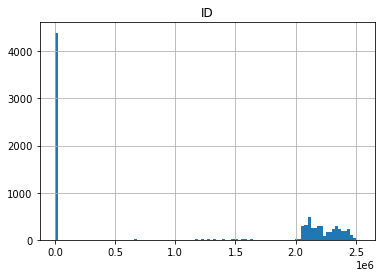

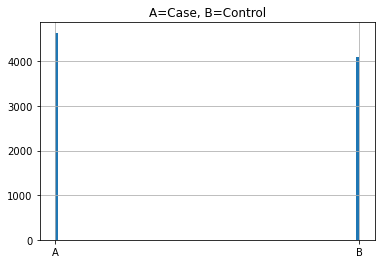

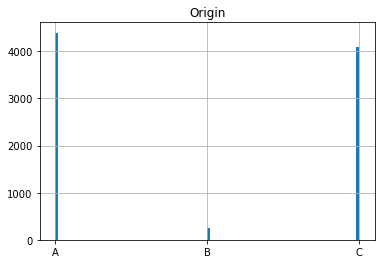

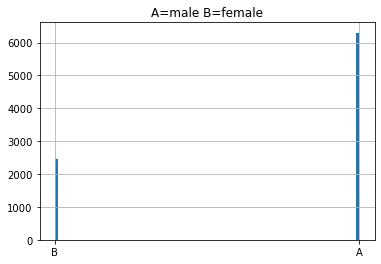

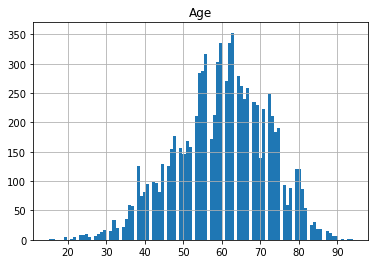

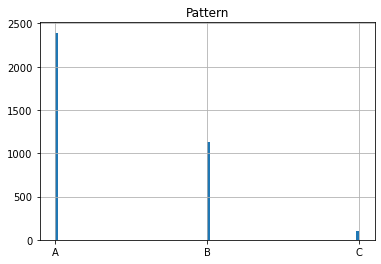

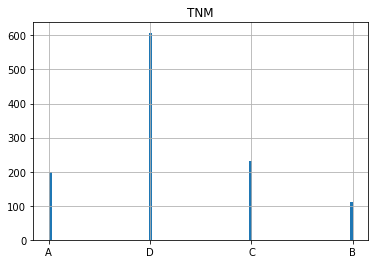

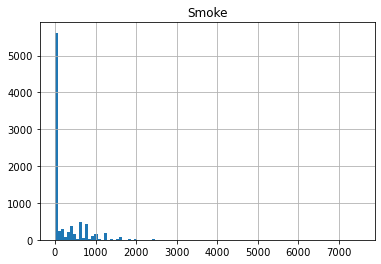

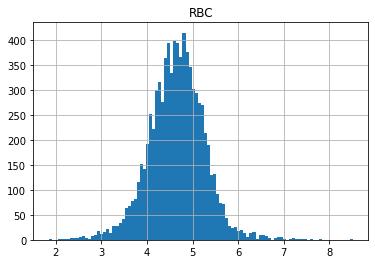

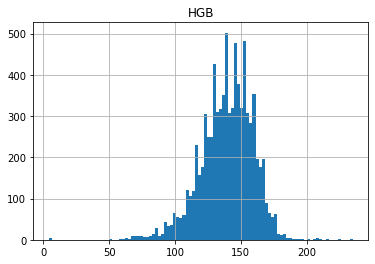

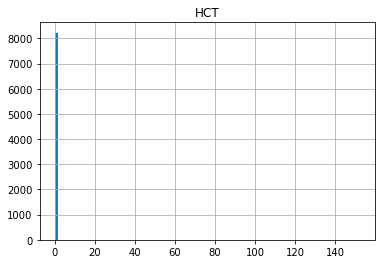

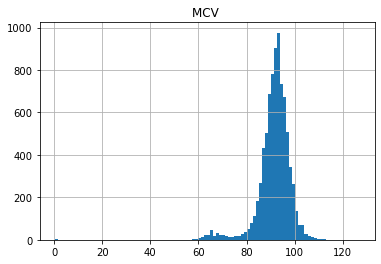

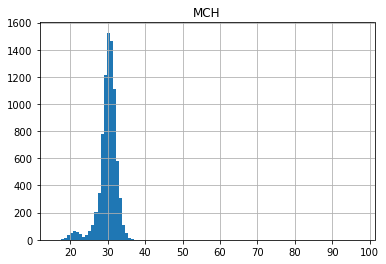

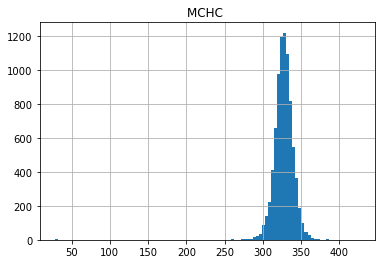

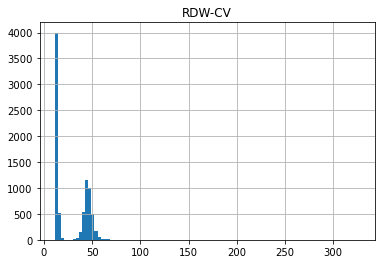

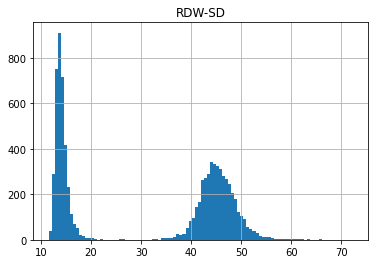

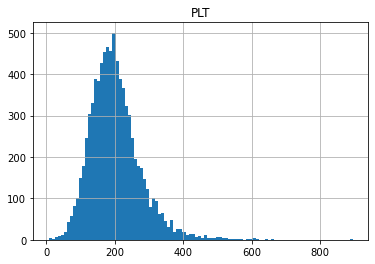

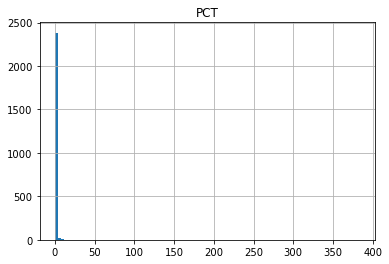

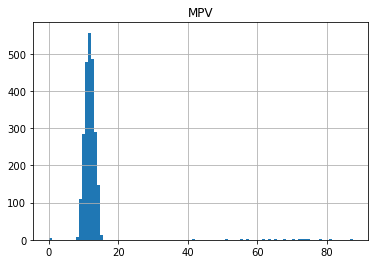

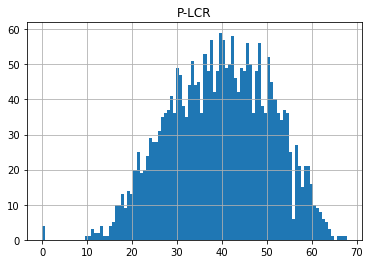

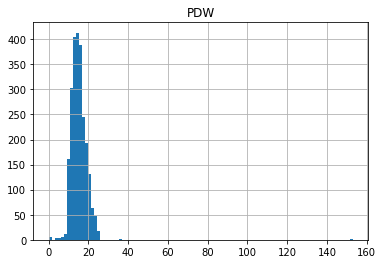

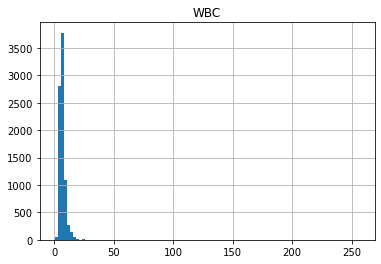

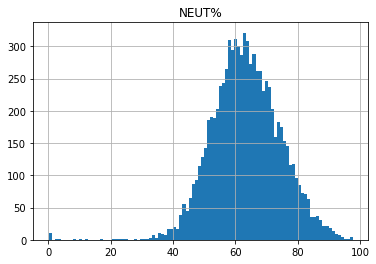

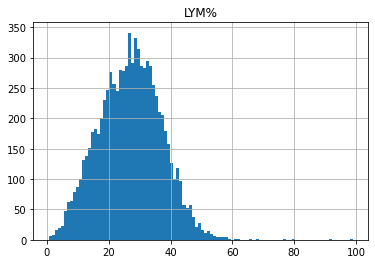

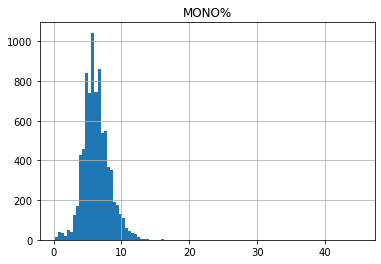

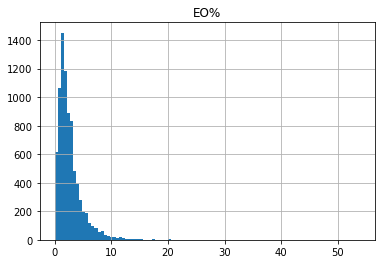

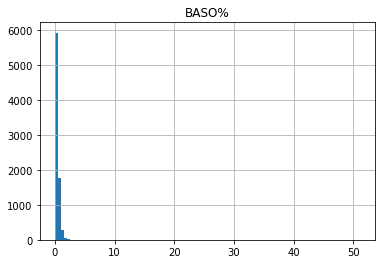

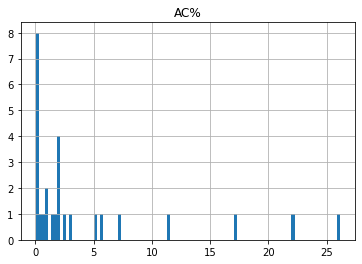

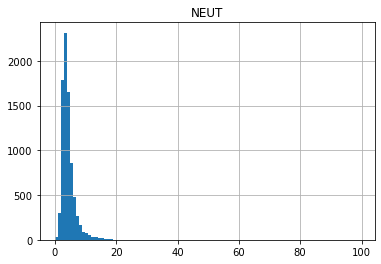

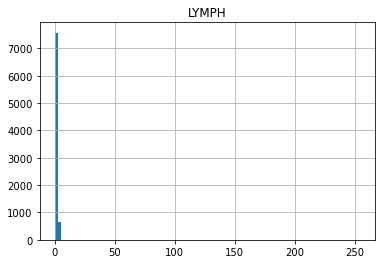

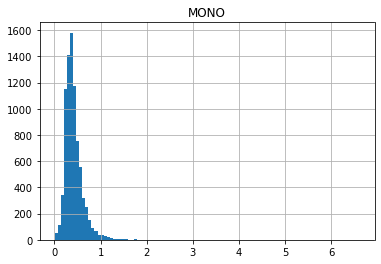

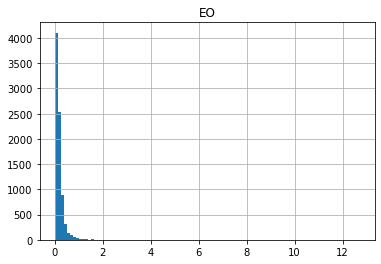

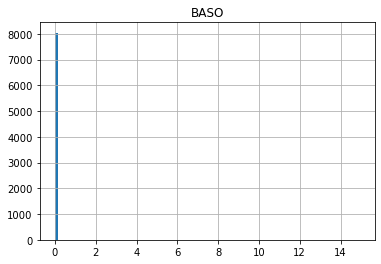

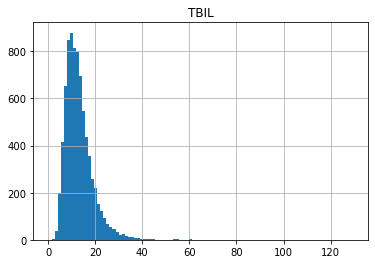

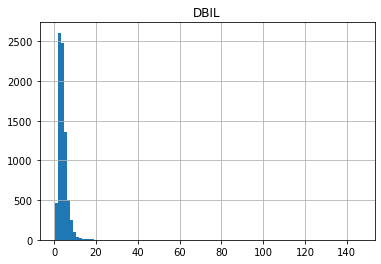

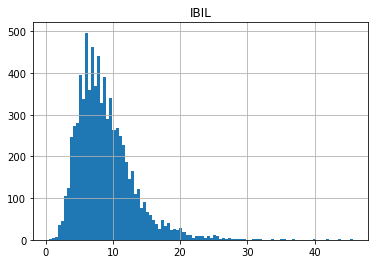

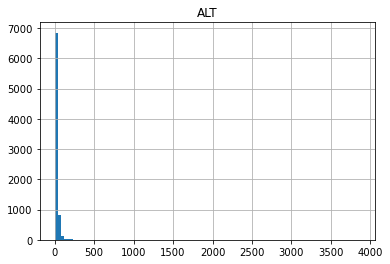

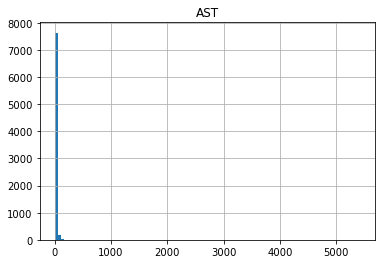

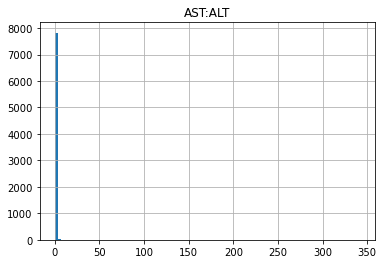

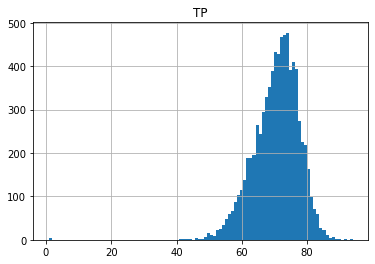

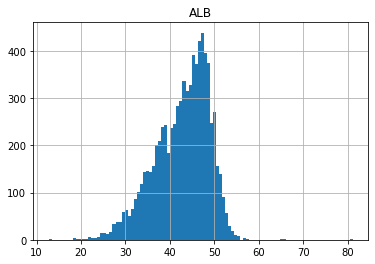

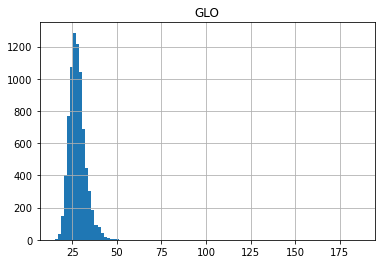

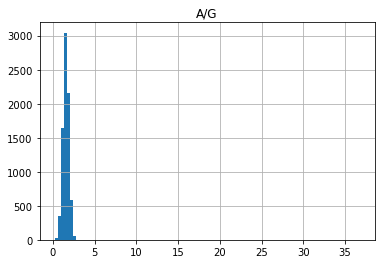

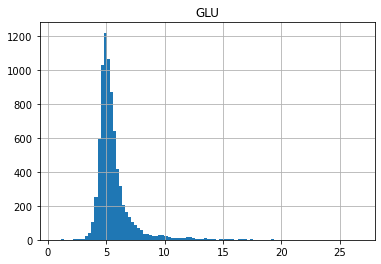

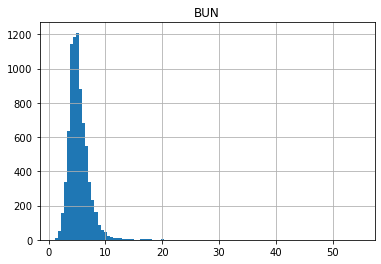

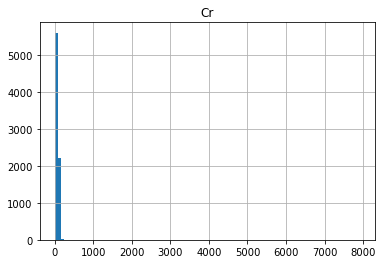

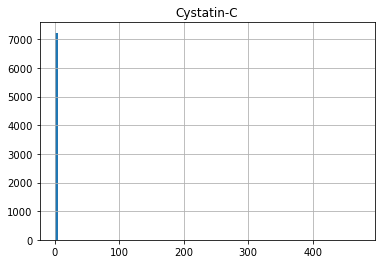

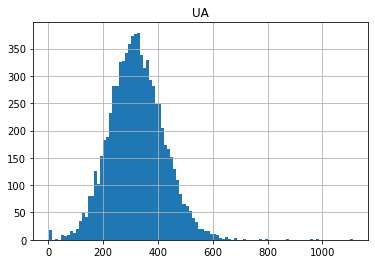

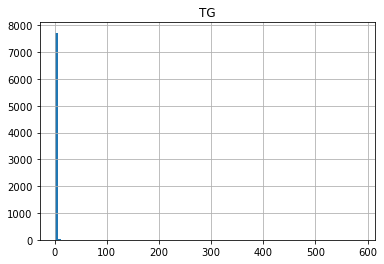

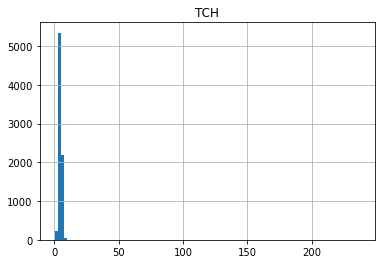

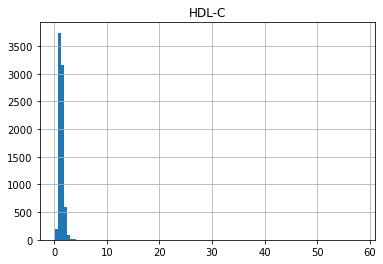

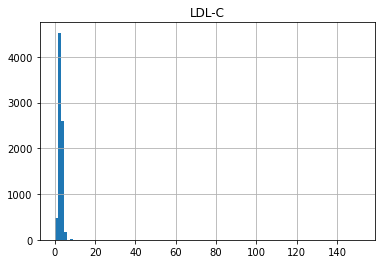

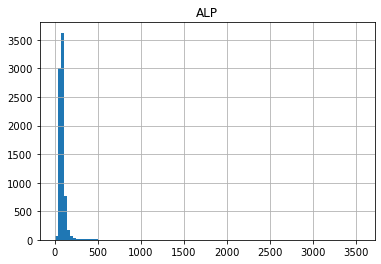

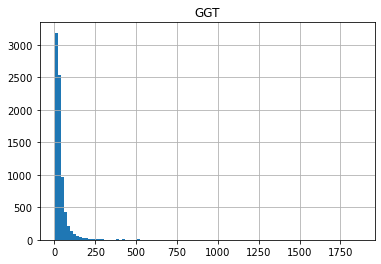

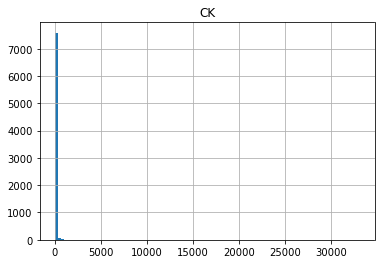

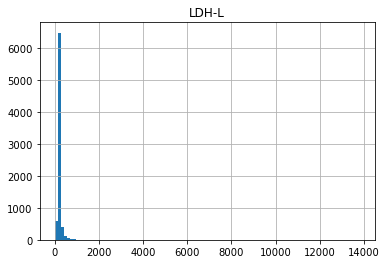

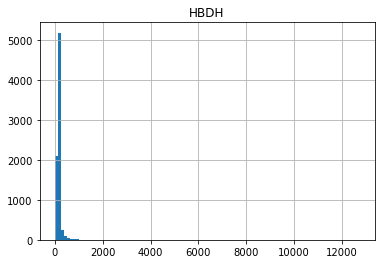

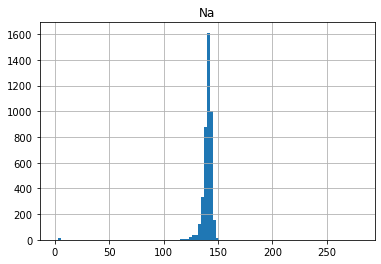

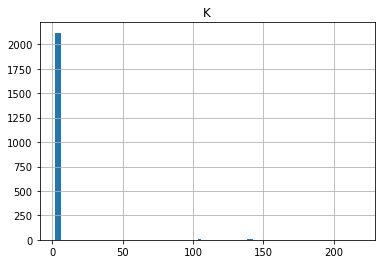

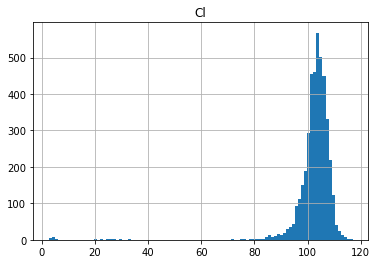

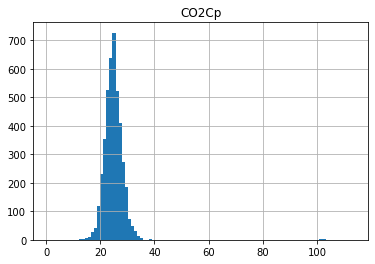

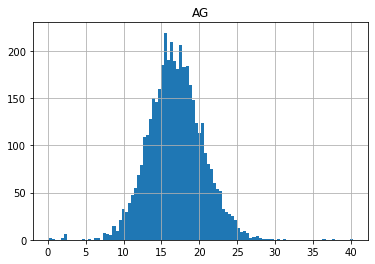

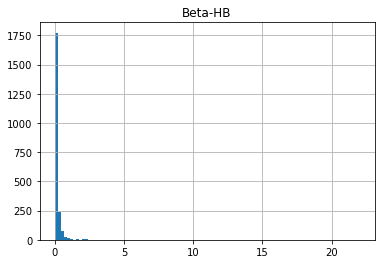

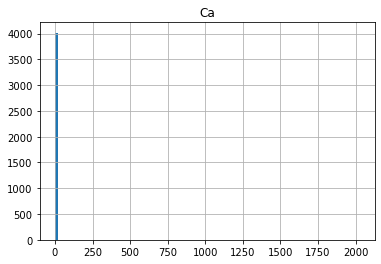

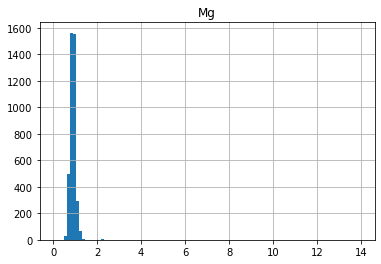

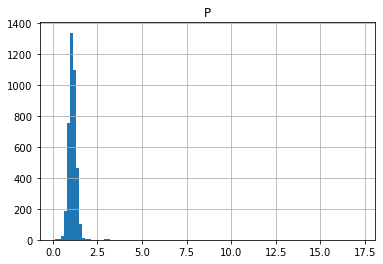

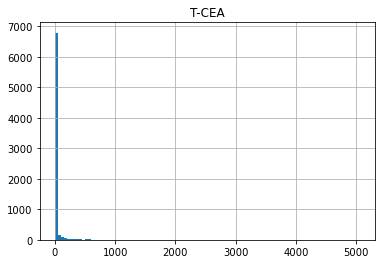

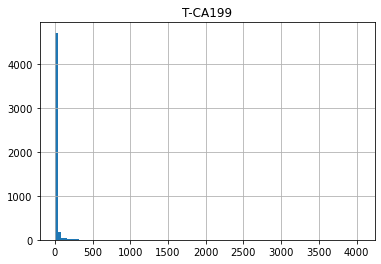

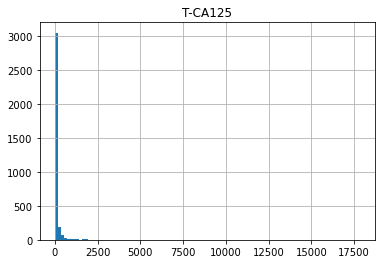

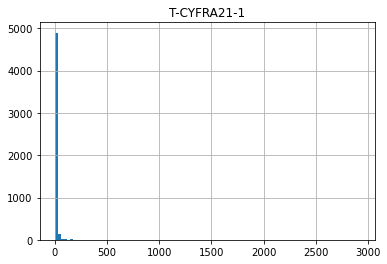

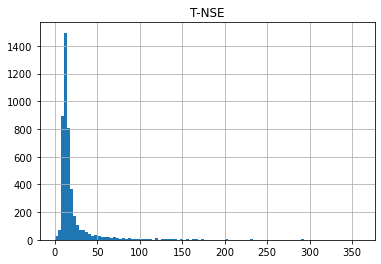

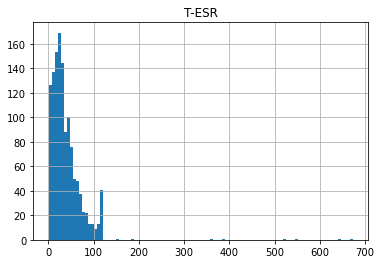

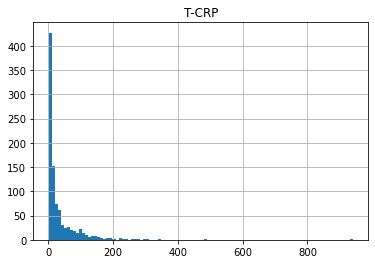

In [3]:
for i in cancer_data2.columns:
    cancer_data2[i].hist(bins=100)
    plt.title(i)
    plt.show()

In [ ]:
def scren_nan(df, row, column):
    
    
    # keep the left part
    samples_nan_rate = dict(df.isnull().sum(axis=1)/df.shape[1] < row)
    features_nan_rate = dict(df.isnull().sum(axis=0)/df.shape[0] < column)
    
    samples_to_select = [k for k, v in samples_nan_rate.items() if str(v)=="True"]
    features_to_select = [k for k, v in features_nan_rate.items() if str(v)=="True"]
    
    return df.T[samples_to_select].T[features_to_select]

In [24]:
group_a = scren_nan(cancer_data2[cancer_data2['A=Case, B=Control'] == 'A'], row = 0.2, column = 0.4)
group_b = scren_nan(cancer_data2[cancer_data2['A=Case, B=Control'] == 'B'], row = 0.5, column = 0.4)

In [124]:
def feature_comparison(group1, group2, features, info):
    fig_size_x = 4
    fig_size_y = (len(features) // fig_size_x) + 1
    plt.figure(dpi=100, figsize=(fig_size_x*2, fig_size_y*2))
    num = 1
    for feature in features:
        plt.subplot(fig_size_y, fig_size_x, num)
        plt.hist([group1[feature], group2[feature]], bins=50)
        plt.title(feature)
        num += 1
    plt.legend(['Case', 'Control'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
    plt.subplots_adjust(wspace=0.8, hspace=0.8)
    plt.savefig(info)
    plt.close()

In [ ]:
%%time
for a in [i/100  for i in range(20, 70, 10)]: #group A
    for b in [i/100  for i in range(20, 70, 10)]: # group B
        for c in [i/100  for i in range(20, 90, 10)]: # columns
            group_a = scren_nan(cancer_data2[cancer_data2['A=Case, B=Control'] == 'A'], row = a, column = c)
            group_b = scren_nan(cancer_data2[cancer_data2['A=Case, B=Control'] == 'B'], row = b, column = c)
            features = [i for i in group_a.columns if i in group_b.columns]
            info = f'{int(a*100)}_{int(b*100)}_{int(c*100)}'
#             print(info)
            feature_comparison(group_a, group_b, features, info)

# --------------------------------------------------

# 打印缺失比例表

In [27]:
def missing_ratio(df):
    group_a = df[df['A=Case, B=Control'] == 'A']
    group_b = df[df['A=Case, B=Control'] == 'B']
    features_nan_rate_a = group_a.isnull().sum(axis=0)/group_a.shape[0]
    features_nan_rate_b = group_b.isnull().sum(axis=0)/group_b.shape[0]

    columns_info = pd.concat([features_nan_rate_a, features_nan_rate_b], axis=1)
    columns_info.columns = ['A', 'B']
    return columns_info

In [6]:
# columns_info.to_csv('../../data/AB组缺失比例.csv')

In [17]:
feature2delete = pd.read_csv('../../data/AB组缺失step1.csv', index_col=0)
feature2delete = feature2delete[feature2delete['Delete'] == 'Y'].index

In [20]:
cancer_data3 = cancer_data2.drop(feature2delete, axis=1)

In [68]:
feature2delete2 = missing_ratio(cancer_data3)

In [82]:
row_info = pd.DataFrame(columns=['MissingRate', 'A_left', 'B_left'])
for i in np.arange(0,1.05,0.05):
    samples_nan_rate = dict(cancer_data3.isnull().sum(axis=1)/cancer_data3.shape[1] < i)
    samples_to_select = [k for k, v in samples_nan_rate.items() if str(v)=="True"]
    cancer_data4 = cancer_data3.T[samples_to_select].T
    a = cancer_data4[cancer_data4['A=Case, B=Control'] == 'A'].shape[0]
    b = cancer_data4[cancer_data4['A=Case, B=Control'] == 'B'].shape[0]
    row_info = row_info.append(pd.DataFrame({'MissingRate':[i], 'A_left':[a], 'B_left':[b]}))

In [83]:
row_info

,MissingRate,A_left,B_left
0,0.00,0,0
0,0.05,2519,2481
0,0.10,3789,3738
0,0.15,3962,3796
0,0.20,3986,3796
0,0.25,4004,3796
0,0.30,4011,3796
0,0.35,4012,3796
0,0.40,4030,3796
0,0.45,4069,3798


In [84]:
# row_info.to_csv('../../data/AB组剩余样本数（By row）.csv', index=False)
# feature2delete2.to_csv('../../data/AB组缺失信息（After step1）.csv')

# 横轴缺失率0.2以上将被过滤

In [85]:
samples_nan_rate = dict(cancer_data3.isnull().sum(axis=1)/cancer_data3.shape[1] < 0.2)
samples_to_select = [k for k, v in samples_nan_rate.items() if str(v)=="True"]
cancer_data4 = cancer_data3.T[samples_to_select].T

In [86]:
cancer_data4

,"A=Case, B=Control",Origin,A=male B=female,Age,Smoke,RBC,HGB,HCT,MCV,MCH,...,ALP,GGT,CK,LDH-L,HBDH,T-CEA,T-CA199,T-CA125,T-CYFRA21-1,T-NSE
ID,,,,,,,,,,,,,,,,,,,,,
1,A,A,B,41,0,3.78,122,0.37,96.6,32.3,...,47,11,38,156,118,NaN,NaN,NaN,NaN,NaN
2,A,A,A,72,0,3.9,124,0.37,95.4,31.8,...,81,60,52,172,136,55.53,14.67,24.7,6.02,12.32
3,A,A,B,79,1200,3.86,121,0.37,96.6,31.3,...,123,17,61,200,155,4.22,206.4,NaN,40.11,17.31
4,A,A,B,52,0,4.72,134,0.4,85.4,28.4,...,138,32,46,282,224,73.5,NaN,1184,26.75,11.6
5,A,A,A,72,600,4.31,132,0.41,94.4,30.6,...,77,23,73,153,113,7.19,29.1,23.29,6.13,11.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2489035,B,C,A,78,0,4.7,154,0.46,97.4,32.8,...,77,22,72,189,153,6.39,NaN,12.8,NaN,NaN
2489054,B,C,A,60,25,4.96,161,0.48,97.4,32.5,...,94,49,96,159,119,1.34,10.9,12.8,NaN,NaN
2491728,B,C,A,48,0,5.35,174,0.51,95.5,32.5,...,60,65,76,164,129,0.97,20.91,8.24,NaN,NaN


In [102]:
column_info = pd.DataFrame(columns=['MissingRate', 'Feature_left', 'Feature_screened'])
for i in np.arange(0,1.05,0.05):
    features_nan_rate = dict(cancer_data4.isnull().sum(axis=0)/cancer_data4.shape[0] < i)
    features_to_select = [k for k, v in features_nan_rate.items() if str(v)=="True"]
    features_be_screened = [k for k, v in features_nan_rate.items() if str(v)=="False"]
    cancer_data5 = cancer_data4[features_to_select]
    column_info = column_info.append(pd.DataFrame({'MissingRate':[i], 'Feature_left':[cancer_data5.shape[1]], 'Feature_screeded':[features_be_screened]}))

In [103]:
# column_info.to_csv('../../data/剩余特征数.csv', index=False)

# 纵轴缺失率0.15以上将被过滤

In [104]:
features_nan_rate = dict(cancer_data4.isnull().sum(axis=0)/cancer_data4.shape[0] < 0.15)
features_to_select = [k for k, v in features_nan_rate.items() if str(v)=="True"]
cancer_data5 = cancer_data4[features_to_select]

In [105]:
cancer_data5

,"A=Case, B=Control",Origin,A=male B=female,Age,Smoke,RBC,HGB,HCT,MCV,MCH,...,TG,TCH,HDL-C,LDL-C,ALP,GGT,CK,LDH-L,HBDH,T-CEA
ID,,,,,,,,,,,,,,,,,,,,,
1,A,A,B,41,0,3.78,122,0.37,96.6,32.3,...,0.53,3.86,1.99,1.67,47,11,38,156,118,NaN
2,A,A,A,72,0,3.9,124,0.37,95.4,31.8,...,1.08,4.85,1.54,2.74,81,60,52,172,136,55.53
3,A,A,B,79,1200,3.86,121,0.37,96.6,31.3,...,2.57,4.55,1.39,2.39,123,17,61,200,155,4.22
4,A,A,B,52,0,4.72,134,0.4,85.4,28.4,...,1.81,9.01,1.92,6.06,138,32,46,282,224,73.5
5,A,A,A,72,600,4.31,132,0.41,94.4,30.6,...,2.18,4.62,0.96,2.54,77,23,73,153,113,7.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2489035,B,C,A,78,0,4.7,154,0.46,97.4,32.8,...,1.24,5.68,1.49,3.76,77,22,72,189,153,6.39
2489054,B,C,A,60,25,4.96,161,0.48,97.4,32.5,...,1.82,5.39,1.35,3.4,94,49,96,159,119,1.34
2491728,B,C,A,48,0,5.35,174,0.51,95.5,32.5,...,0.97,5.22,1.11,3.71,60,65,76,164,129,0.97


In [106]:
cancer_data5.to_csv('../../data/cancer_data_v3.csv', index=False)